# Lecture 2: Gradient Descent

This notebook will illustrate gradient descent in a simple linear regression example with a single predictor.  It will also illustrate how to construct functions in python.

Let's start by importing all of our plotting functionality and numpy:

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/civisemployee/anaconda3/envs/civis/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Here, we construct a simulated dataset:
$$y = 8x+ \epsilon$$
where
$$\epsilon \sim N(0, 2)$$

In [4]:
# np.random.rand gives us uniformly distributed random numbers [0, 1], so multiplying by 10 gives us [0, 10]
X = 10*np.random.rand(50) 
# np.random.randn gives us standard normal random numbers, so multiplying by 2 gives us N(0, 2)
eps = 2*np.random.randn(50)
# our final simulated dataset
y = 8*X+eps

Let's take a look at our dataset:

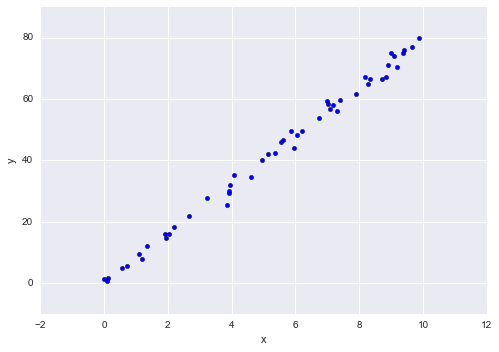

In [5]:
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's define a function that takes two arguments-a set of predictions and a set of true y values-and returns the average squared loss:

In [6]:
def loss_function(preds, y):
    sq_residuals = (y-preds)**2
    rss = np.sum(sq_residuals)/len(sq_residuals)
    return rss

Let's define a function that will take coefficients and a set of x values and return the predictions for a linear model:

In [7]:
def predict_linear_model(b0, b1, x_to_pred):
    preds = b0+b1*x_to_pred
    return preds

And finally, a function that will plot our data, a linear model, and return the loss function value:

In [9]:
def plot_data_and_preds(b0, b1, x_to_pred):
    preds = predict_linear_model(b0, b1, x_to_pred)

    plt.scatter(X, y)
    plt.plot(X, preds, c="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Regression Line", "Raw Data"])
    plt.show()

    the_loss = loss_function(preds, y)
    print("loss=%s" % the_loss)
    return the_loss

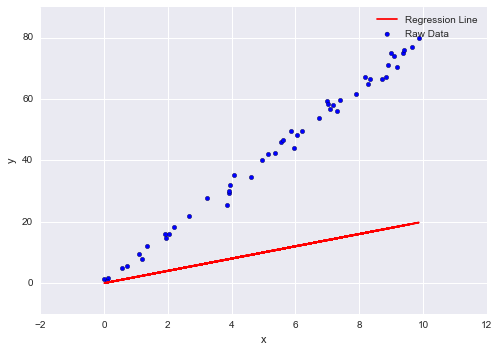

loss=1361.15606643


1361.1560664273022

In [10]:
plot_data_and_preds(0, 2, X)

This function will create a bunch of beta values, plot the linear regression line for each, calculate the loss, and make a plot of the loss as a function of beta.  Notice how to specify a default value for a parameter to a function:

In [12]:
def plot_loss_function(y, X, n_points=5):
    # equally spaced array of 5 values between -20 and 20, like the seq function in R
    beta1s = np.linspace(-20, 20, n_points)
    losses = []
    for beta1 in beta1s:
        print("beta1=%s " % beta1)
        loss = plot_data_and_preds(0, beta1, X)
        losses.append(loss)
    plt.scatter(beta1s, losses)
    plt.xlabel("beta1")
    plt.ylabel("J")
    plt.show()

beta1=-20.0 


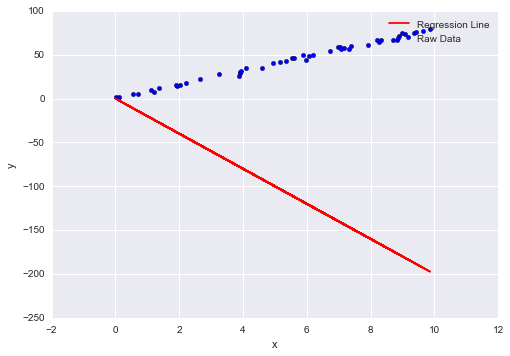

loss=29662.4437791
beta1=-17.8947368421 


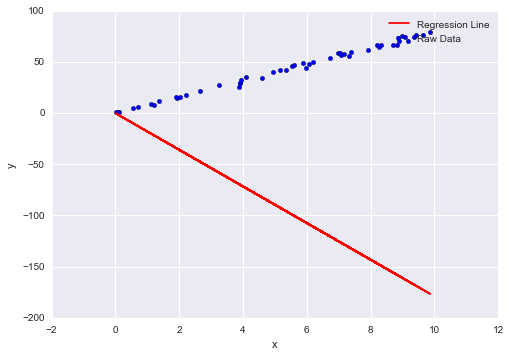

loss=25368.4332804
beta1=-15.7894736842 


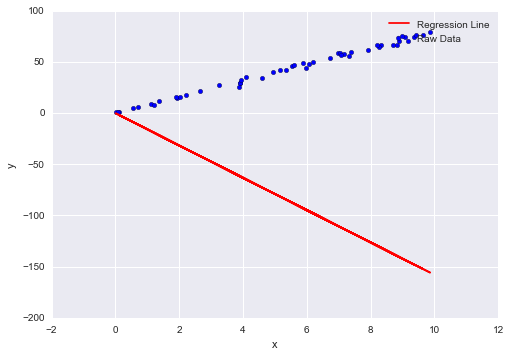

loss=21410.031946
beta1=-13.6842105263 


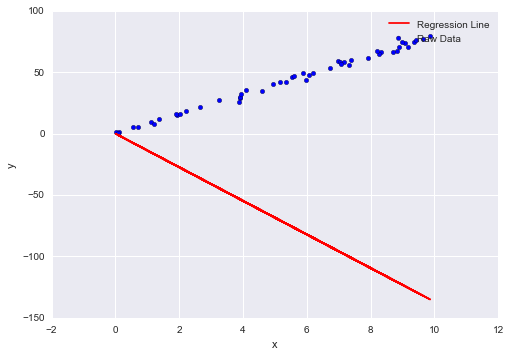

loss=17787.2397759
beta1=-11.5789473684 


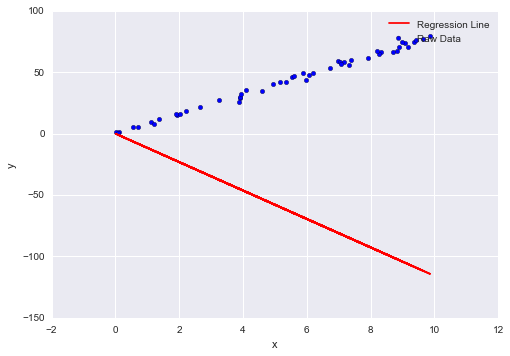

loss=14500.0567702
beta1=-9.47368421053 


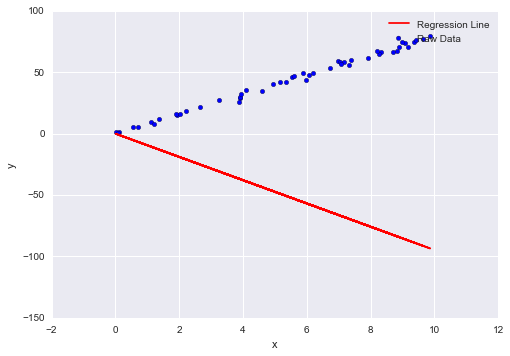

loss=11548.4829287
beta1=-7.36842105263 


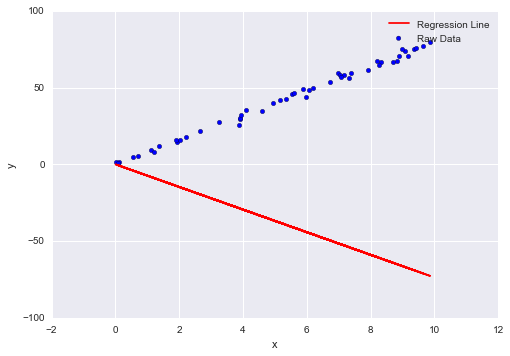

loss=8932.51825145
beta1=-5.26315789474 


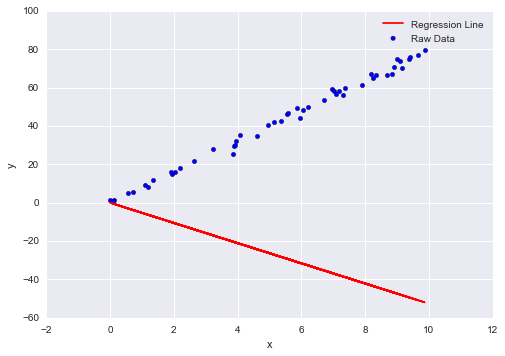

loss=6652.16273854
beta1=-3.15789473684 


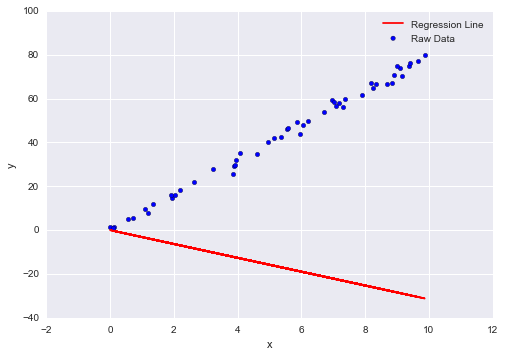

loss=4707.41638993
beta1=-1.05263157895 


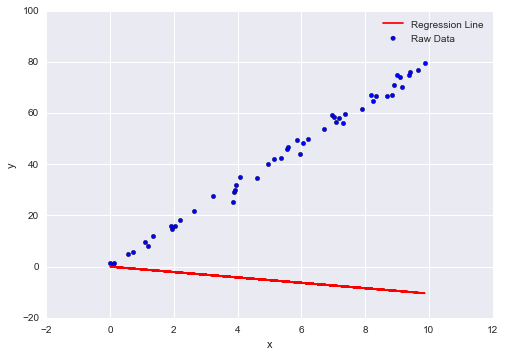

loss=3098.27920561
beta1=1.05263157895 


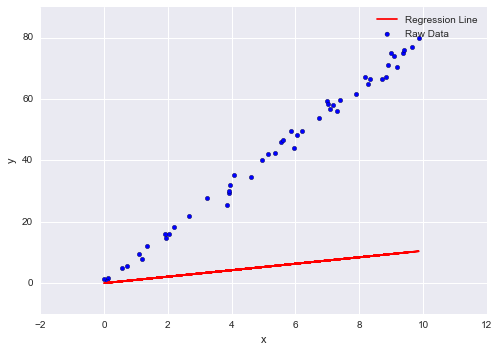

loss=1824.75118559
beta1=3.15789473684 


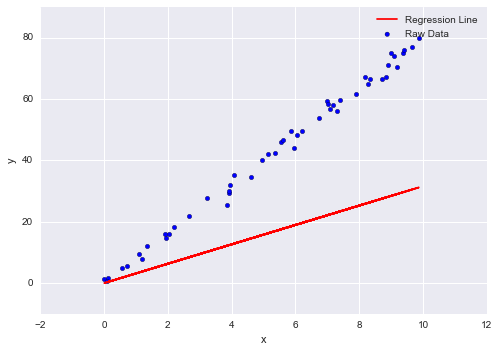

loss=886.832329858
beta1=5.26315789474 


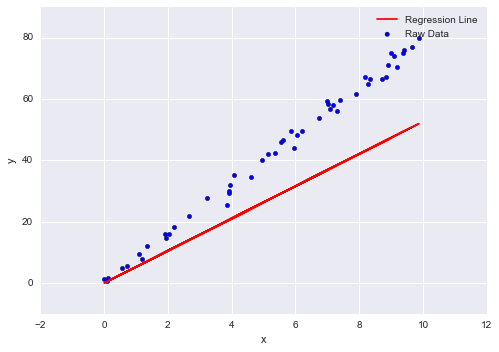

loss=284.522638425
beta1=7.36842105263 


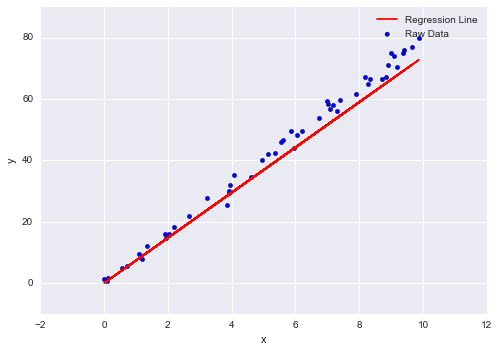

loss=17.8221112862
beta1=9.47368421053 


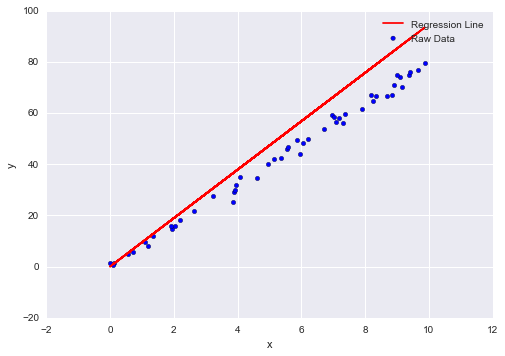

loss=86.7307484428
beta1=11.5789473684 


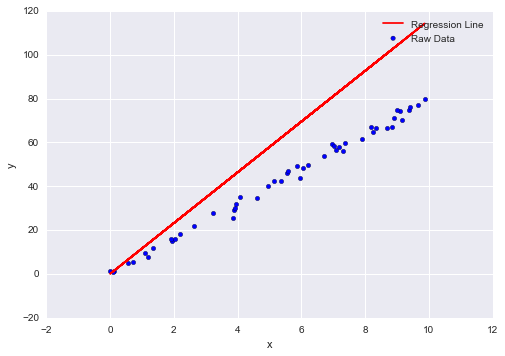

loss=491.248549894
beta1=13.6842105263 


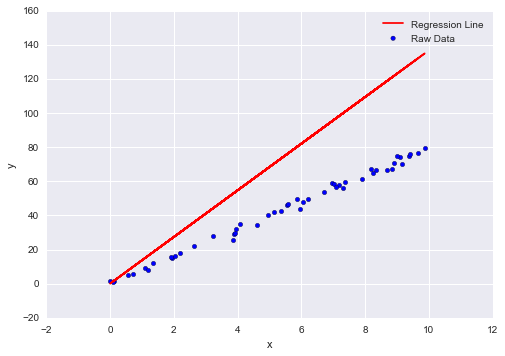

loss=1231.37551564
beta1=15.7894736842 


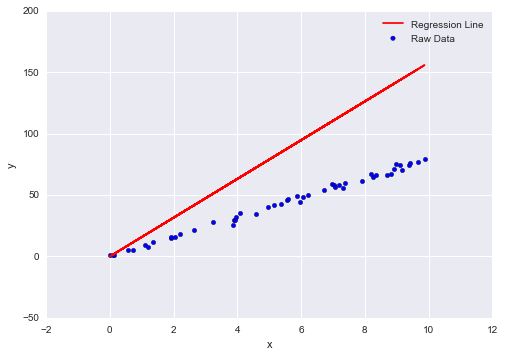

loss=2307.11164568
beta1=17.8947368421 


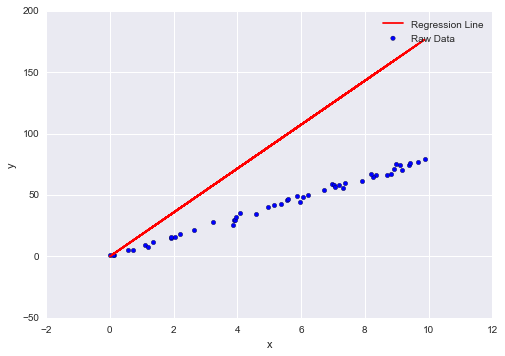

loss=3718.45694002
beta1=20.0 


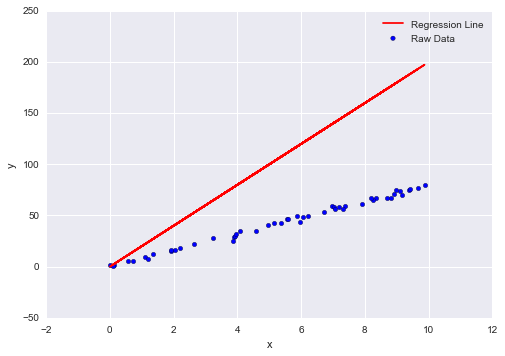

loss=5465.41139865


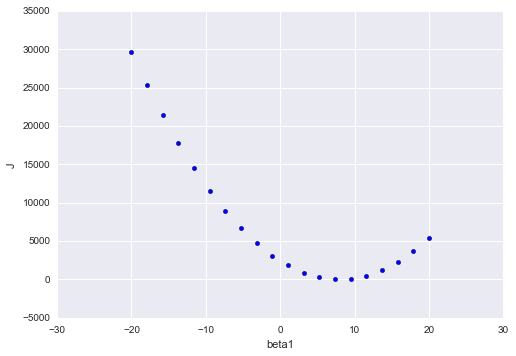

In [13]:
#plot_loss_function(y, X)
plot_loss_function(y, X, 20)

This function will return the value of the gradient of the loss function with respect to $\beta_1$:

In [14]:
def gradient_b1(b0, b1, y, X):
    grad = np.sum(-2.0*X*(y-b0-b1*X))/len(X)
    return grad

In [15]:
# the gradient at 20 is positive...
gradient_b1(0, 20, y, X)
# and at -10 is negative...
gradient_b1(0, -10, y, X)

-1362.1439864516992

And finally, this function will run our gradient descent algorithm to get to the minumum value of $\beta_1$.

In [16]:
def gradient_descent(b0_start, b1_start, y, X, learning_rate=0.01, n_steps=25):
    b1 = b1_start
    print("b1=%s" % b1)
    for i in range(n_steps):
        grad = gradient_b1(b0_start, b1, y, X)
        #print "gradient=%s" % grad
        b1 = b1-learning_rate*grad
        print("b1=%s" % b1)

In [17]:
# play with different learning rates: 0.00001, 0.1, 10
gradient_descent(0, 15, y, X, learning_rate=0.01)

b1=15
b1=9.690985441
b1=8.40205320772
b1=8.08912389032
b1=8.01315034016
b1=7.99470534314
b1=7.99022723314
b1=7.98914002943
b1=7.98887607613
b1=7.98881199307
b1=7.98879643487
b1=7.98879265762
b1=7.98879174057
b1=7.98879151793
b1=7.98879146388
b1=7.98879145075
b1=7.98879144757
b1=7.98879144679
b1=7.98879144661
b1=7.98879144656
b1=7.98879144655
b1=7.98879144655
b1=7.98879144655
b1=7.98879144655
b1=7.98879144655
b1=7.98879144655


In [18]:
# things can go terribly wrong and diverge if the learning rate is too high
gradient_descent(0, 20, y, X, learning_rate=10)

b1=20
b1=-9075.1054437
b1=6868808.95227
b1=-5194312134.38
b1=3.92803325877e+12
b1=-2.97045014991e+15
b1=2.24630839705e+18
b1=-1.69869924087e+21
b1=1.2845872431e+24
b1=-9.71428223097e+26
b1=7.34611679899e+29
b1=-5.55526705332e+32
b1=4.20099392348e+35
b1=-3.17686796615e+38
b1=2.40240530175e+41
b1=-1.81674255756e+44
b1=1.37385374485e+47
b1=-1.03893317431e+50
b1=7.85660151041e+52
b1=-5.94130487115e+55
b1=4.49292273831e+58
b1=-3.3976298423e+61
b1=2.56934944526e+64
b1=-1.94298875342e+67
b1=1.46932341293e+70
b1=-1.11112907266e+73


In [19]:
# a tiny learning rate with converge slowly
gradient_descent(0, 20, y, X, learning_rate=0.00001, n_steps=100)

b1=20
b1=19.9909048946
b1=19.9818166761
b1=19.9727353394
b1=19.9636608792
b1=19.9545932904
b1=19.9455325678
b1=19.9364787061
b1=19.9274317001
b1=19.9183915447
b1=19.9093582347
b1=19.9003317648
b1=19.89131213
b1=19.882299325
b1=19.8732933446
b1=19.8642941837
b1=19.8553018372
b1=19.8463162998
b1=19.8373375665
b1=19.828365632
b1=19.8194004912
b1=19.810442139
b1=19.8014905702
b1=19.7925457797
b1=19.7836077624
b1=19.7746765131
b1=19.7657520267
b1=19.7568342981
b1=19.7479233221
b1=19.7390190937
b1=19.7301216077
b1=19.7212308591
b1=19.7123468427
b1=19.7034695535
b1=19.6945989863
b1=19.685735136
b1=19.6768779977
b1=19.6680275661
b1=19.6591838362
b1=19.6503468029
b1=19.6415164613
b1=19.6326928061
b1=19.6238758323
b1=19.6150655349
b1=19.6062619089
b1=19.597464949
b1=19.5886746505
b1=19.579891008
b1=19.5711140168
b1=19.5623436716
b1=19.5535799675
b1=19.5448228994
b1=19.5360724623
b1=19.5273286512
b1=19.5185914611
b1=19.509860887
b1=19.5011369238
b1=19.4924195665
b1=19.4837088102
b1=19.4750046499
